# Project Overview: Detecting Undervaluation and Overvaluation of Imported Goods
## Author: Paul Sentongo

## Introduction
The objective of this project is to detect undervaluation and overvaluation of imported goods by predicting the unit price of a given commodity in local currency. This is critical for ensuring fair trade practices and accurate taxation. This project involves several stages including data preparation, exploratory data analysis, feature engineering, model building, evaluation, and deployment.

## Key Steps
1. **Data Collection and Preparation**
   - Load the dataset and understand its structure.
   - Clean and preprocess the data.
   - Handle missing values and detect outliers.
   
2. **Exploratory Data Analysis (EDA)**
   - Conduct descriptive statistics to understand data distribution.
   - Visualize data to identify patterns and relationships.

3. **Feature Engineering**
   - Create new features that may enhance model performance.
   - Normalize or scale features if necessary.

4. **Model Building**
   - Select appropriate machine learning algorithms.
   - Train and validate models using cross-validation.
   
5. **Model Evaluation**
   - Evaluate models using relevant metrics.
   - Select the best-performing model based on evaluation results.

6. **Model Deployment**
   - Preparing the final model for deployment.
   - Deploying the model using a suitable platform (e.g., Streamlit, Flask for web deployment).

7. **Monitoring and Maintenance**
   - Monitor model performance in production.
   - Update the model as necessary based on new data and feedback.

## Tools and Technologies
- **Programming Language:** Python
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Flask
- **Deployment Platform:** Streamlit, Flask, Docker

This comprehensive approach ensures a robust solution for detecting pricing discrepancies in imported goods, thereby aiding in regulatory compliance and economic fairness.


In [ ]:
#Mounting the drive since dataset is saved on the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#setting path for the data dictionary and the dataset
file_path = '/content/drive/My Drive/ScaleDown.xlsx'
dict_path = '/content/drive/My Drive/Data_Dictionary.xlsx'

In [ ]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, Dataset

In [ ]:
#Reading the dataset and the data dictionary
data = pd.read_excel(file_path)
data_dict = pd.read_excel(dict_path)

### Important Variables definition

| Attribute           | Description                                    |
| :------------------ | :--------------------------------------------- |
| TAR_HSC_NB1         | Harmonized system commodity code (HS code)     |
| GDS_ORG_CTY         | Country of origin (code)                       |
| VIT_WGT_GRS         | Gross mass (including packaging)               |
| VIT_WGT_NET         | Net mass (excluding packaging)                 |
| TAR_PRI             | Item price                                     |
| VIT_CIF             | CIF (Cost, Insurance, and Freight) value in local currency |
| TAX_AMT             | Duties and taxes amount for the item           |
| UNIT_PRICE_LOCAL    | Unit price in local currency                   |


In [ ]:
#To check the data types of the variables in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 85 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   INSTANCEID       1048575 non-null  int64  
 1   KEY_ITM_NBR      1048575 non-null  int64  
 2   PCK_NBR          992454 non-null   float64
 3   CONC             1048575 non-null  int64  
 4   TAR_SUP_QTY      113 non-null      float64
 5   PCK_MRK1         983757 non-null   object 
 6   PCK_MRK2         405762 non-null   object 
 7   PCK_TYP_COD      757517 non-null   object 
 8   PCK_TYP_NAM      990697 non-null   object 
 9   TAR_HSC_NB1      1047822 non-null  float64
 10  TAR_PRC_EXT      992460 non-null   float64
 11  TAR_PRC_NAT      992443 non-null   float64
 12  TAR_QUO          6174 non-null     object 
 13  TAR_PRI          697458 non-null   float64
 14  TAR_VMT          7 non-null        object 
 15  TAR_AIC          0 non-null        float64
 16  GDS_ORG_CTY      1

In [ ]:
# To check the shape of the dataset
data.shape

(1048575, 85)

1048575 rows: This indicates the dataset contains 1,048,575 observations or entries. Each row represents an individual record or instance in the dataset.
85 columns: This means there are 85 attributes (features or variables) for each record.
##### Key takeaways from the shape of the dataset:
Large Dataset: With over a million rows, this is a relatively large dataset. This may require efficient processing techniques and hardware for analysis, especially if performing computationally expensive tasks.
Wide Dataset: The presence of 85 columns suggests a high-dimensional dataset, which could make feature selection and dimensionality reduction important if some attributes are irrelevant or redundant.

In [ ]:
# Displaying the first 3 features of the dataset
data.head(3)

,INSTANCEID,KEY_ITM_NBR,PCK_NBR,CONC,TAR_SUP_QTY,PCK_MRK1,PCK_MRK2,PCK_TYP_COD,PCK_TYP_NAM,TAR_HSC_NB1,...,FLP1,DOC_REF_DAT,DOC_REF_NBR,WRI_SUP_COD,WRI_SUP_NAM,WRI_SUP_QTY,WRI_PRG,TAR_HSC_NB3,GDS_DS3,LNK_TPT
0,1,1,25.0,11,NaN,Without marks,NaN,CT,CARTON,85441900.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
1,1,2,550.0,12,NaN,Without marks,NaN,CT,CARTON,69010000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018
2,1,3,2.0,13,NaN,Without marks,NaN,CT,CARTON,83023000.0,...,(BLOB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SZHAS2018


#### Note: The dataset has been structured to deal with only the relevant variables to the task. The business context is similar to the classification case but this time, the objective is to detect undervaluation or overvaluation of imported goods by predicting the unit price of a given commodity in local currency, given a set of attributes or features and this makes it a regression task.

#### Dependent (Predictor) Variable
##### This is a derived column which we have named UNIT_PRICE_LOCAL.The formula applied is where
##### UNIT_PRICE_LOCAL = VIT_INV_AMT_NMU (Amount of the invoice in national monetary) / TAR_SUP_QTY

In [ ]:
#Creating UNIT_PRICE_LOCAL
    # Handling potential division by zero or missing values

data['UNIT_PRICE_LOCAL'] = np.where(
        (data['TAR_SUP_QTY'].notna()) & (data['TAR_SUP_QTY'] != 0),
        data['VIT_INV_AMT_NMU'] / data['TAR_SUP_QTY'],
        np.nan
    )

In [ ]:
## Select Relevant Columns
columns_to_keep = [
        'TAR_HSC_NB1',  # Harmonized System Code
        'GDS_ORG_CTY',  # Country of Origin
        'VIT_WGT_GRS',  # Gross Weight
        'VIT_WGT_NET',  # Net Weight
        'TAR_PRI',      # Possibly Price-related
        'VIT_CIF',      # Cost, Insurance, Freight
        'TAX_AMT',      # Tax Amount
        'UNIT_PRICE_LOCAL'  # Derived Target Variable
    ]

data_processed = data[columns_to_keep].copy()

### DATA CLEANING
#### Duplicates
#### Missing values
#### Outliers

In [ ]:
# Check for duplicate rows in the dataframe
duplicates = data_processed.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 147711


In [ ]:
# Remove duplicate rows and keep the first occurrence
data_processed = data_processed.drop_duplicates()

# Verify the updated dataframe
print(f"Shape after removing duplicates: {data_processed.shape}")


Shape after removing duplicates: (900864, 8)


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data_processed.isnull().sum())


Missing Values:
TAR_HSC_NB1              1
GDS_ORG_CTY            229
VIT_WGT_GRS          11866
VIT_WGT_NET          11882
TAR_PRI             286769
VIT_CIF              12022
TAX_AMT               3595
UNIT_PRICE_LOCAL    900753
dtype: int64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Imputing or drop missing values
data_processed['TAR_HSC_NB1'].fillna(data_processed['TAR_HSC_NB1'].mode()[0], inplace=True)
data_processed['GDS_ORG_CTY'].fillna(data_processed['GDS_ORG_CTY'].mode()[0], inplace=True)
data_processed['VIT_WGT_GRS'].fillna(data_processed['VIT_WGT_GRS'].median(), inplace=True)
data_processed['VIT_WGT_NET'].fillna(data_processed['VIT_WGT_NET'].median(), inplace=True)
data_processed = data_processed.dropna(subset=['TAR_PRI'])  # Drop rows with TAR_PRI missing
data_processed['VIT_CIF'].fillna(data_processed['VIT_CIF'].median(), inplace=True)#Impute with the mean or median, as this likely represents a numerical feature.
data_processed['TAX_AMT'].fillna(0, inplace=True)#Since this is likely numerical, impute with 0 if it represents "no tax," or use the mean/median if it represents missing data in a continuous context.
data_processed.dropna(subset=['UNIT_PRICE_LOCAL'], inplace=True)  # Critical column

# Verify missing values
print(data_processed.isnull().sum())


TAR_HSC_NB1         0
GDS_ORG_CTY         0
VIT_WGT_GRS         0
VIT_WGT_NET         0
TAR_PRI             0
VIT_CIF             0
TAX_AMT             0
UNIT_PRICE_LOCAL    0
dtype: int64


In [ ]:
data_processed.head()

,TAR_HSC_NB1,GDS_ORG_CTY,VIT_WGT_GRS,VIT_WGT_NET,TAR_PRI,VIT_CIF,TAX_AMT,UNIT_PRICE_LOCAL
3,94015000.0,CN,194.54,150.0,1285.39,1285.39,447.56,257.0780
4,94031000.0,CN,194.54,150.0,1344.86,1344.86,468.26,268.9720
5,85181000.0,CN,77.82,50.0,102.91,102.91,35.81,51.4550
6,94031000.0,CN,972.72,900.0,1543.66,1543.66,537.49,61.7464
7,85163100.0,CN,155.64,124.0,164.66,164.66,92.55,41.1650


### Renaming columns to give them a better meaning

In [ ]:
# Define the renaming dictionary based on your specifications
rename_dict = {
    'TAR_HSC_NB1': 'HS code',
    'GDS_ORG_CTY': 'Country of origin - code',
    'VIT_WGT_GRS': 'Gross mass',
    'VIT_WGT_NET': 'Net mass',
    'TAR_PRI': 'Item price',
    'VIT_CIF': 'AMT-National-Monetory-units',
    'TAX_AMT': 'Item amount of Duties and taxes',
    'UNIT_PRICE_LOCAL': 'UNIT_PRICE_LOCAL'  # Already created
}

# Rename the columns
data_processed.rename(columns=rename_dict, inplace=True)

In [ ]:
data_processed.columns

Index(['HS code', 'Country of origin - code', 'Gross mass', 'Net mass',
       'Item price', 'AMT-National-Monetory-units',
       'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL'],
      dtype='object')

### DESCRIPTIVE STATISTICS

In [ ]:
print("\nDescriptive Statistics:")
data_processed.describe()


Descriptive Statistics:


,HS code,Gross mass,Net mass,Item price,AMT-National-Monetory-units,Item amount of Duties and taxes,UNIT_PRICE_LOCAL
count,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,8.017724e+07,6017.662523,2199.878378,3361.896486,3387.013604,784.882613,1871.215476
std,1.780508e+07,19512.171799,3697.535118,8487.762938,8490.174020,2300.131715,6908.060753
min,2.064900e+06,1.000000,1.000000,6.810000,6.810000,1.450000,0.023011
25%,8.416345e+07,200.000000,200.000000,140.170000,140.170000,38.825000,5.002131
50%,8.513100e+07,600.000000,600.000000,471.880000,471.880000,136.130000,33.852000
75%,8.703331e+07,6804.000000,1844.000000,1800.265000,1800.265000,413.300000,264.231000
max,9.608100e+07,200000.000000,23500.000000,42117.040000,42117.040000,16918.400000,42117.040000


### DETECTING OUTLIERS USING THE Z-SCORE METHOD

In [ ]:
# Outlier Detection stage
def detect_outliers(data_processed, column):
        """
        Detect outliers using Z-score method

        Args:
            data_processed (pd.DataFrame): Input DataFrame
            column (str): Column to check for outliers

        Returns:
            pd.Series: Boolean series indicating outliers
        """
        z_scores = np.abs(stats.zscore(data_processed[column]))
        return z_scores > 3

print("\nOutliers Detection:")
numeric_columns = ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL']
for col in numeric_columns:
        outliers = detect_outliers(data_processed, col)
        print(f"{col} Outliers: {outliers.sum()} ({outliers.sum()/len(data_processed)*100:.2f}%)")


Outliers Detection:
Gross mass Outliers: 1 (0.90%)
Net mass Outliers: 2 (1.80%)
Item price Outliers: 5 (4.50%)
AMT-National-Monetory-units Outliers: 5 (4.50%)
Item amount of Duties and taxes Outliers: 2 (1.80%)
UNIT_PRICE_LOCAL Outliers: 4 (3.60%)


### DETECTING OUTLIERS WITH BOXPLOTS

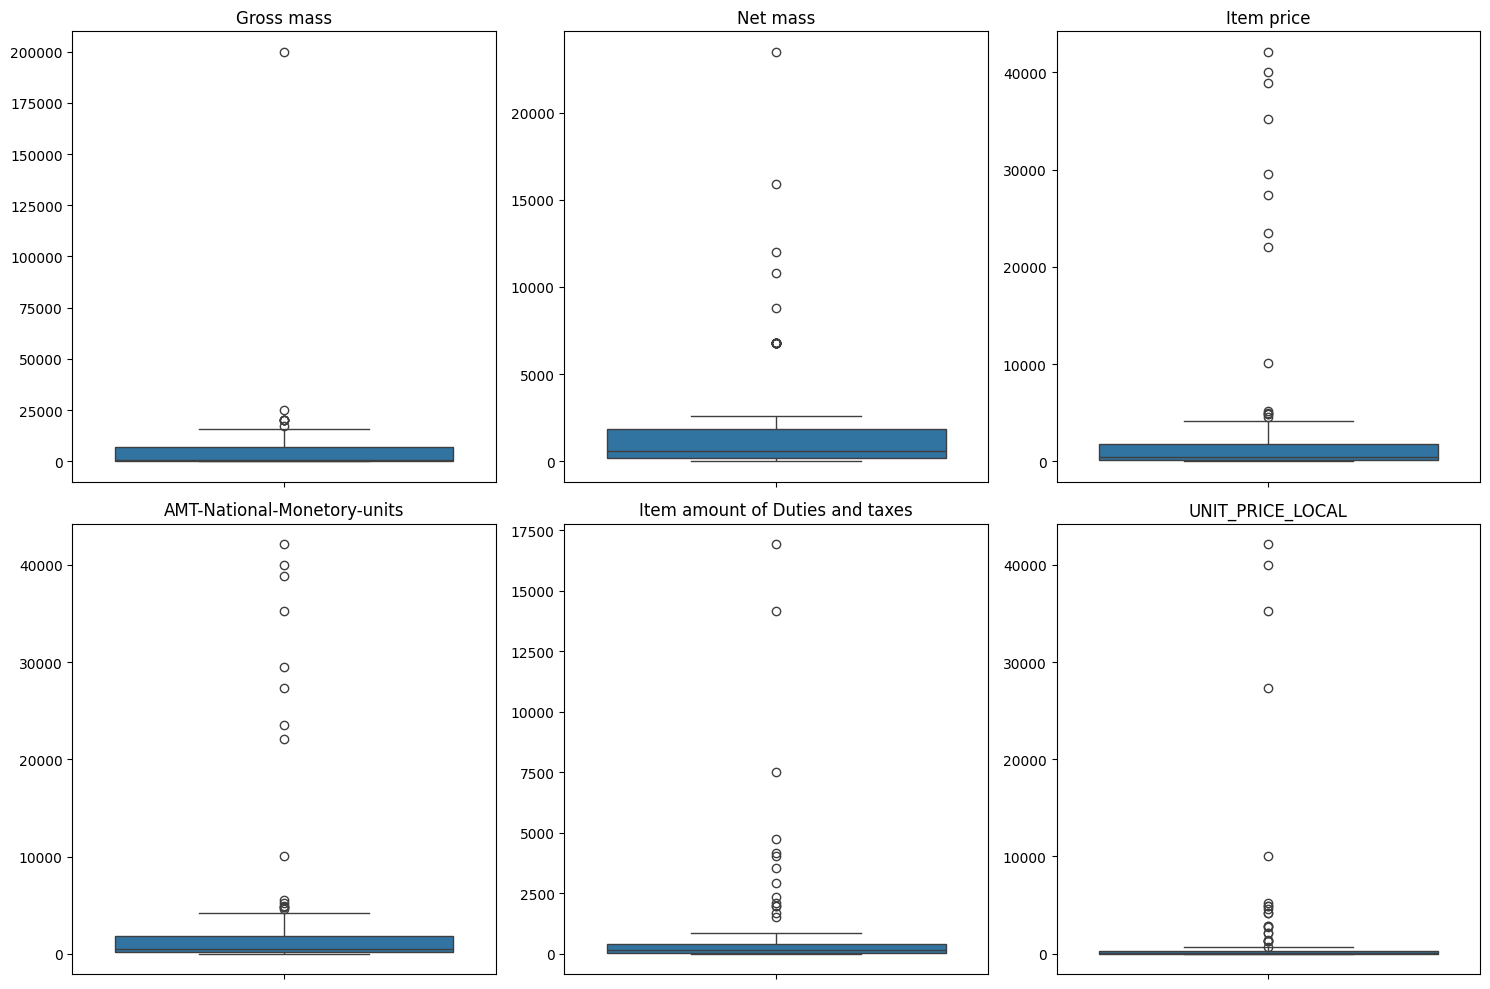

In [ ]:
# Create boxplots for specified numeric columns
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

numeric_columns = ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL']

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.ylabel('')  # Remove y-axis label for cleaner look

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Shape after removing outliers: (76, 8)


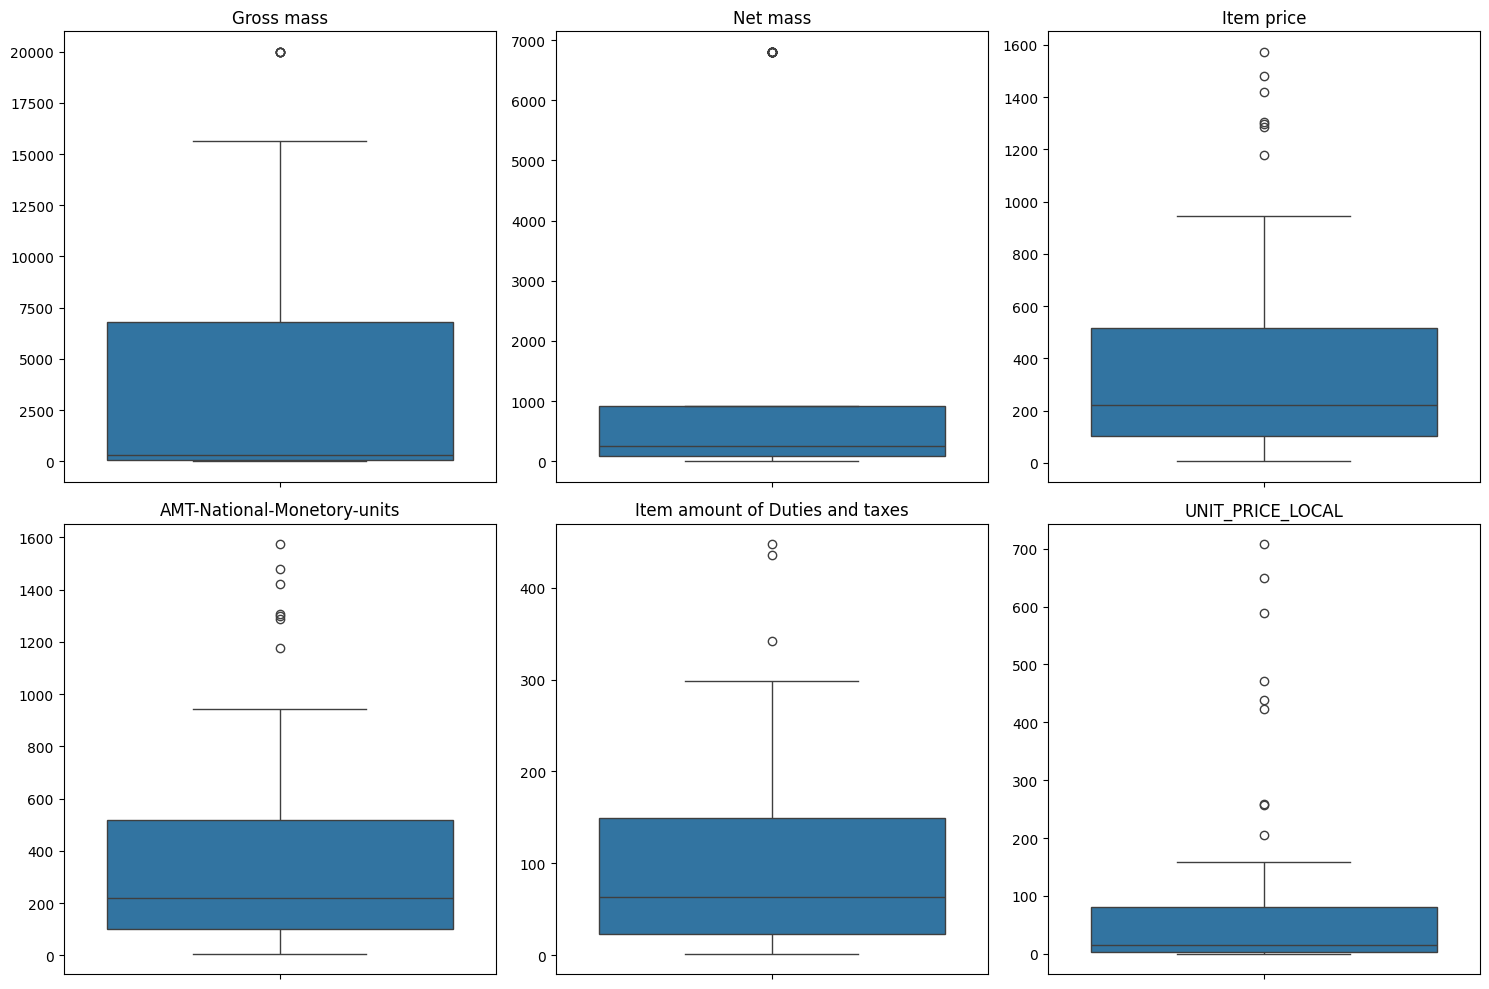

In [ ]:
# Remove outliers based on z-score
for col in numeric_columns:
    outliers = detect_outliers(data_processed, col)
    data_processed = data_processed[~outliers]

# Verify the updated dataframe after outlier removal
print(f"Shape after removing outliers: {data_processed.shape}")

# Recheck outliers with boxplots after removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

## DATA VISUALIZATION

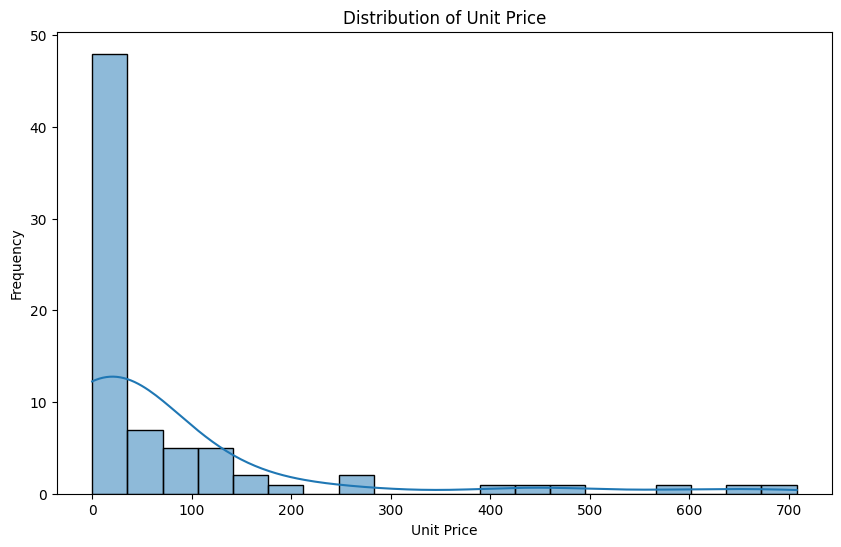

In [ ]:
# Data Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_processed['UNIT_PRICE_LOCAL'], kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

### KEY INSIGHTS
#### Right-Skewed Distribution: The histogram clearly shows that the distribution of unit prices is heavily right-skewed. The majority of the data points are concentrated towards the lower end of the price spectrum, with a long tail extending towards higher prices. This is typical for datasets involving monetary values where a few items are significantly more expensive than the majority.

#### Concentration of Low Prices: A significant number of items have unit prices close to zero, as indicated by the high frequency bar at the beginning of the histogram. This suggests that many items in the dataset are low in cost, which might be due to either genuinely low-value items or potentially undervalued items that need further investigation.

#### Outliers: The presence of data points extending beyond 200 units and sparse distribution up to over 700 units indicates potential outliers. These outliers should be investigated to determine if they are legitimate high-value items or errors that need correction.

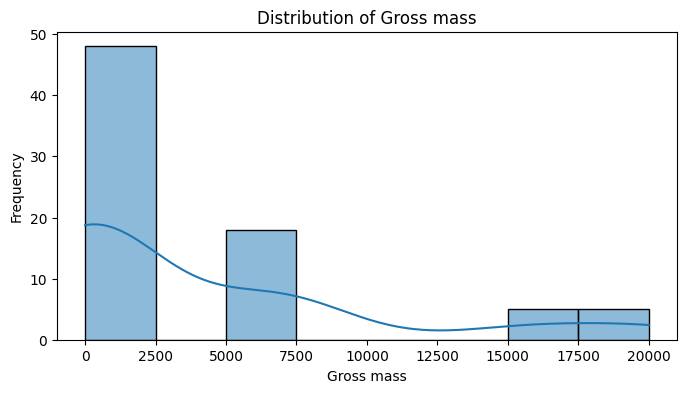

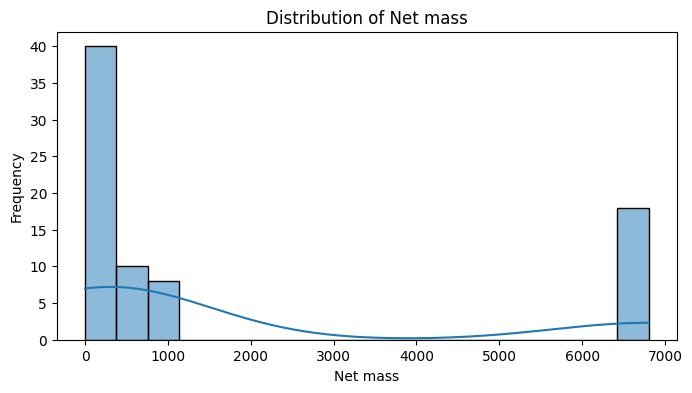

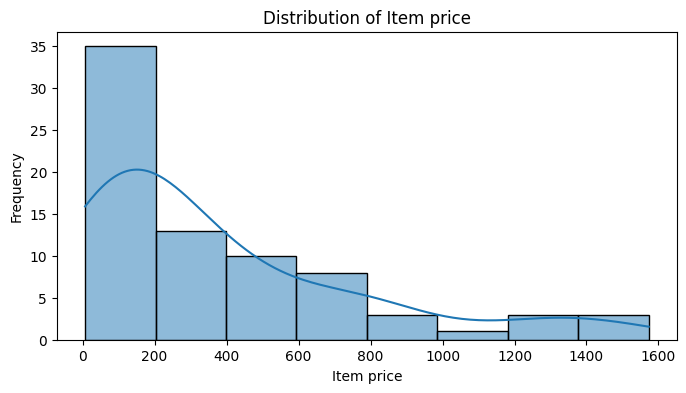

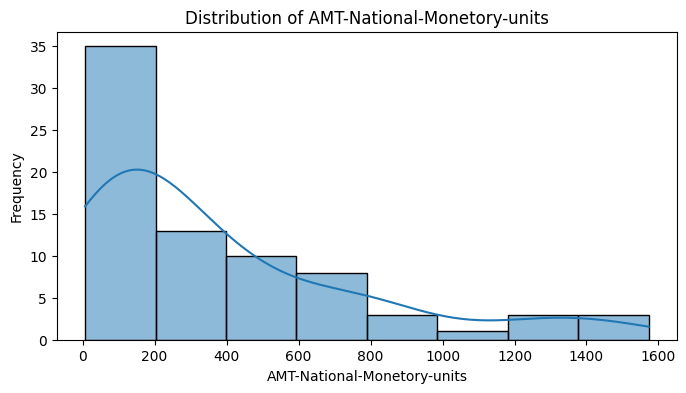

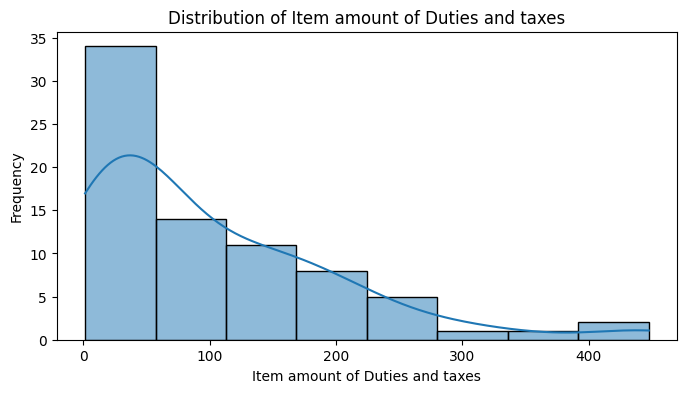

In [ ]:
# Variable Distributions (Numeric Variables)
for col in ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_processed[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### KEY INSIGHTS
###The histogram displayed above provides a visualization of the distribution of the item amount of duties and taxes within the dataset. Here are some key insights:

###Right-Skewed Distribution: Similar to the distribution of unit prices, the item amount of duties and taxes also exhibits a right-skewed distribution. Most values are clustered towards the lower end, with a long tail extending towards higher amounts. This suggests that the majority of items have lower associated duties and taxes, with only a few items having significantly higher values.

###Concentration of Low Values: The highest frequency bar at the lower end of the distribution indicates that many items have relatively low amounts of duties and taxes. This could be due to a large number of items being low in value or having preferential duty rates.

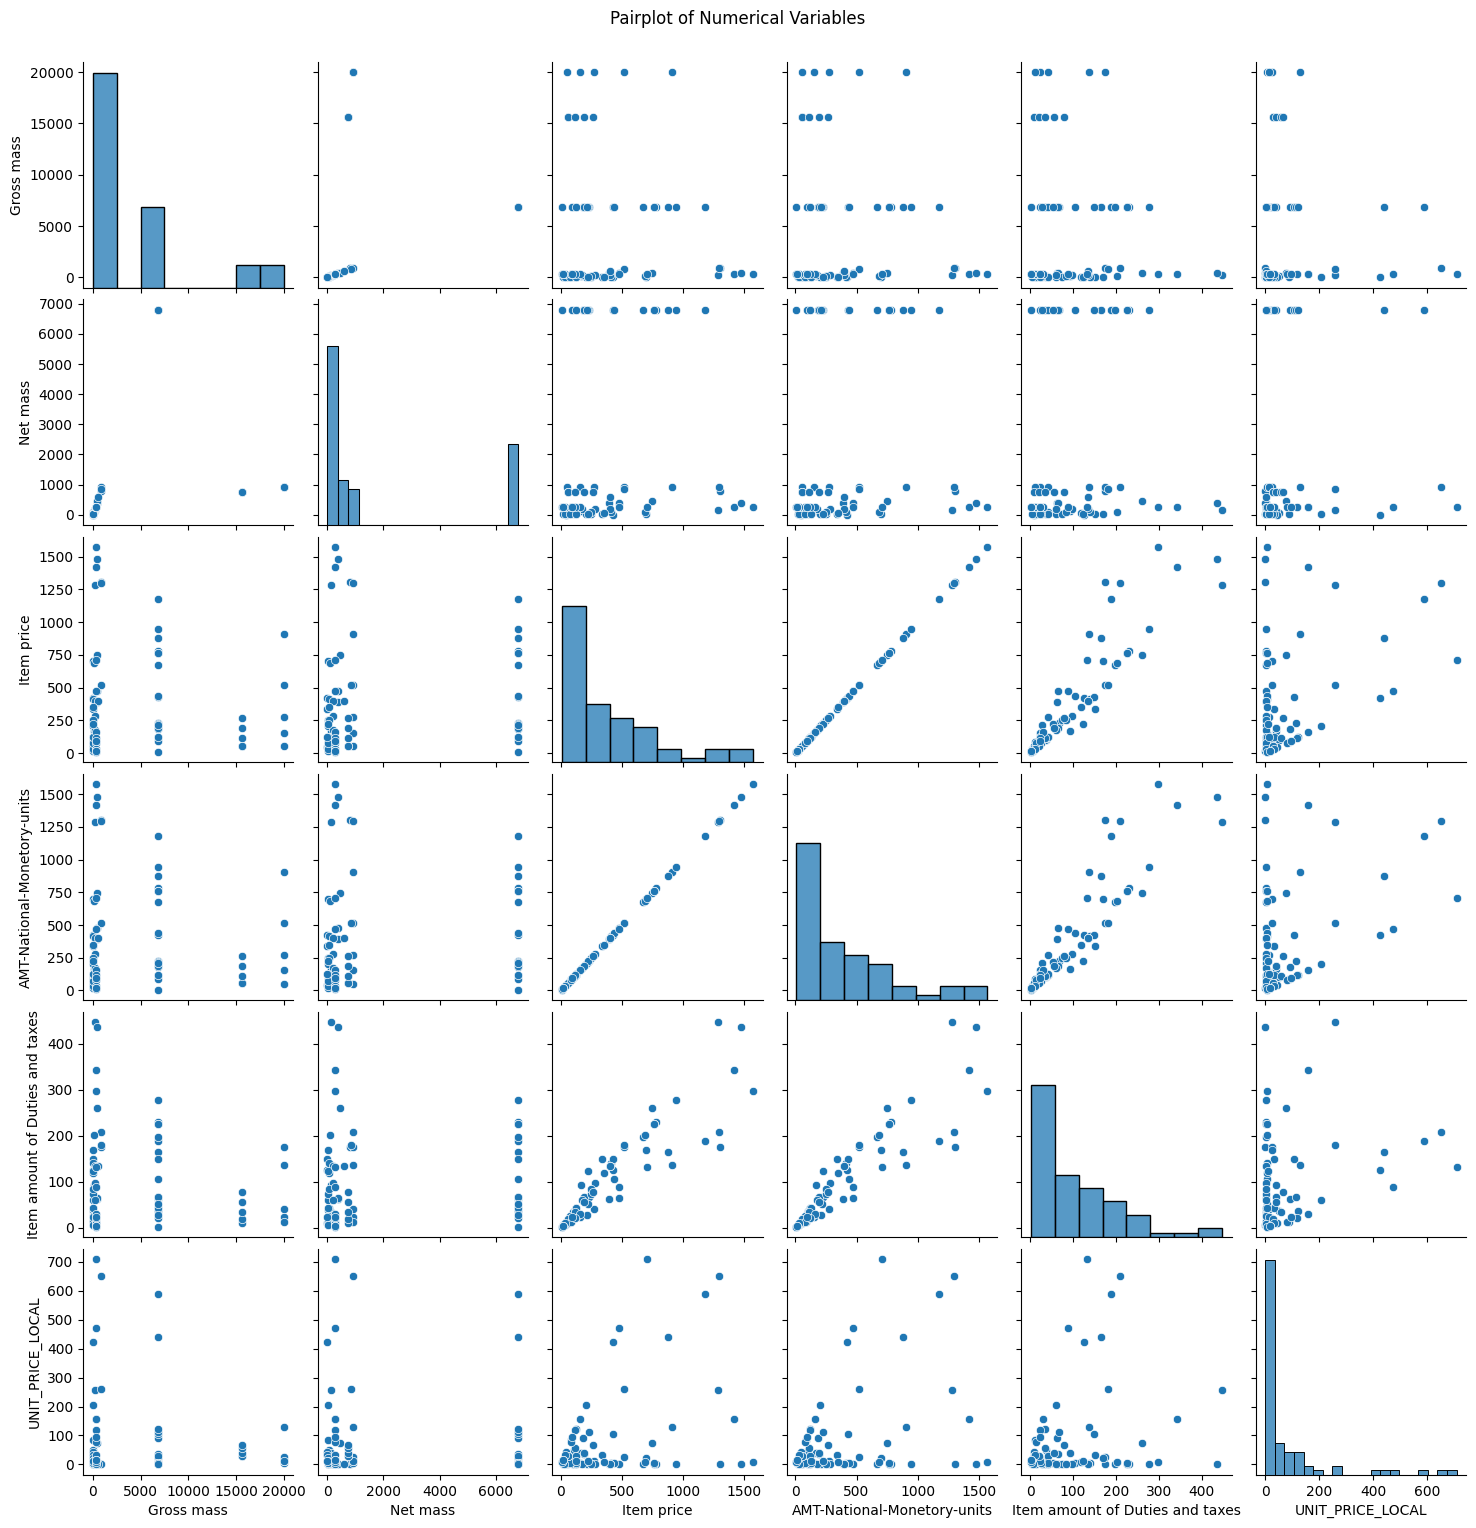

In [ ]:
# Variable Relationships
sns.pairplot(data_processed[['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


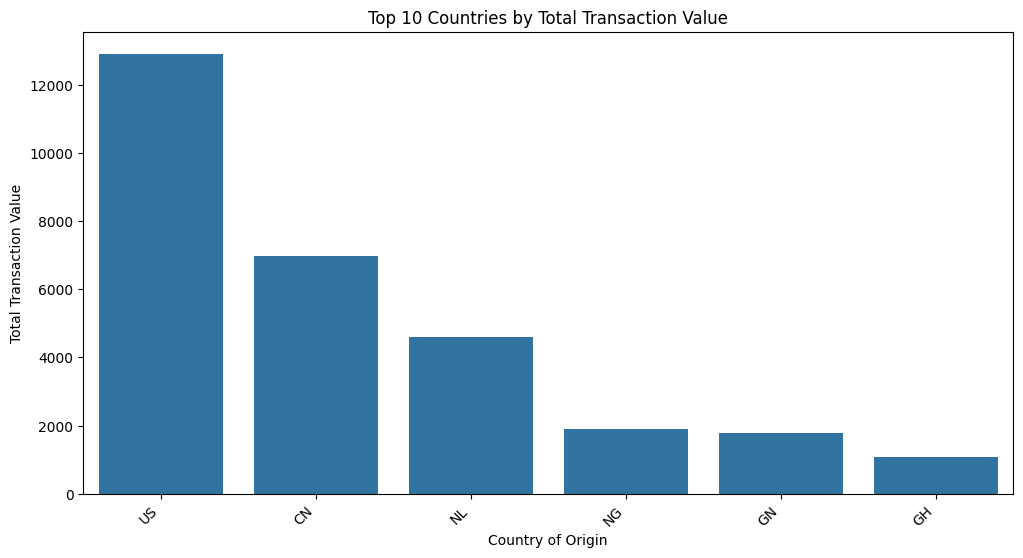

In [ ]:
# Countries with Biggest Transactions (Assuming 'AMT-National-Monetory-units' represents transaction value)
country_transactions = data_processed.groupby('Country of origin - code')['AMT-National-Monetory-units'].sum().sort_values(ascending=False).head(10) # Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x=country_transactions.index, y=country_transactions.values)
plt.title('Top 10 Countries by Total Transaction Value')
plt.xlabel('Country of Origin')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45, ha='right')
plt.show()

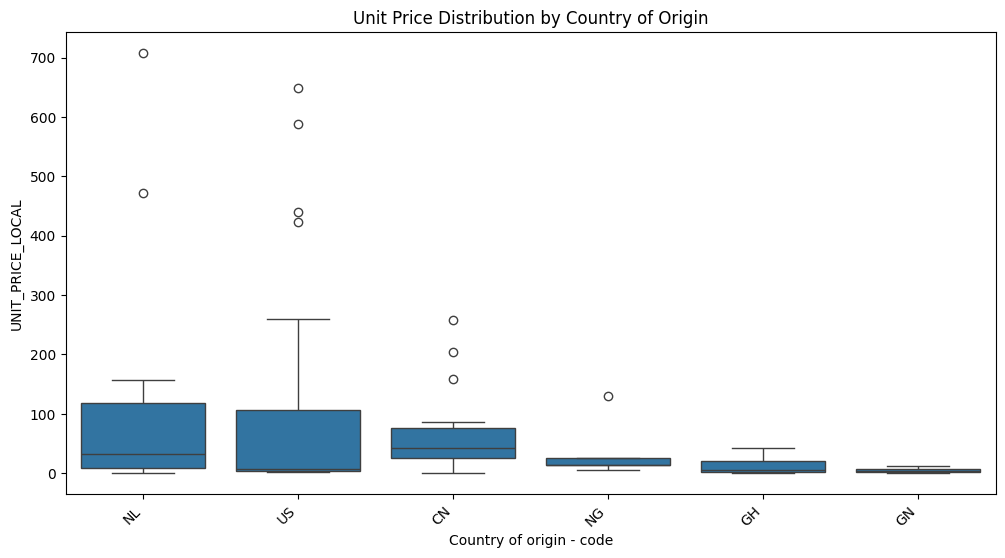

In [ ]:
# Example: Boxplot of Unit Price by Country (if you want to see the distribution of prices across countries)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country of origin - code', y='UNIT_PRICE_LOCAL', data=data_processed.sort_values('UNIT_PRICE_LOCAL', ascending = False).head(1000))  #limit to first 1000 rows
plt.title('Unit Price Distribution by Country of Origin')
plt.xticks(rotation=45, ha='right')
plt.show()

### CORRELATION WITH THE TARGET VARIABLE

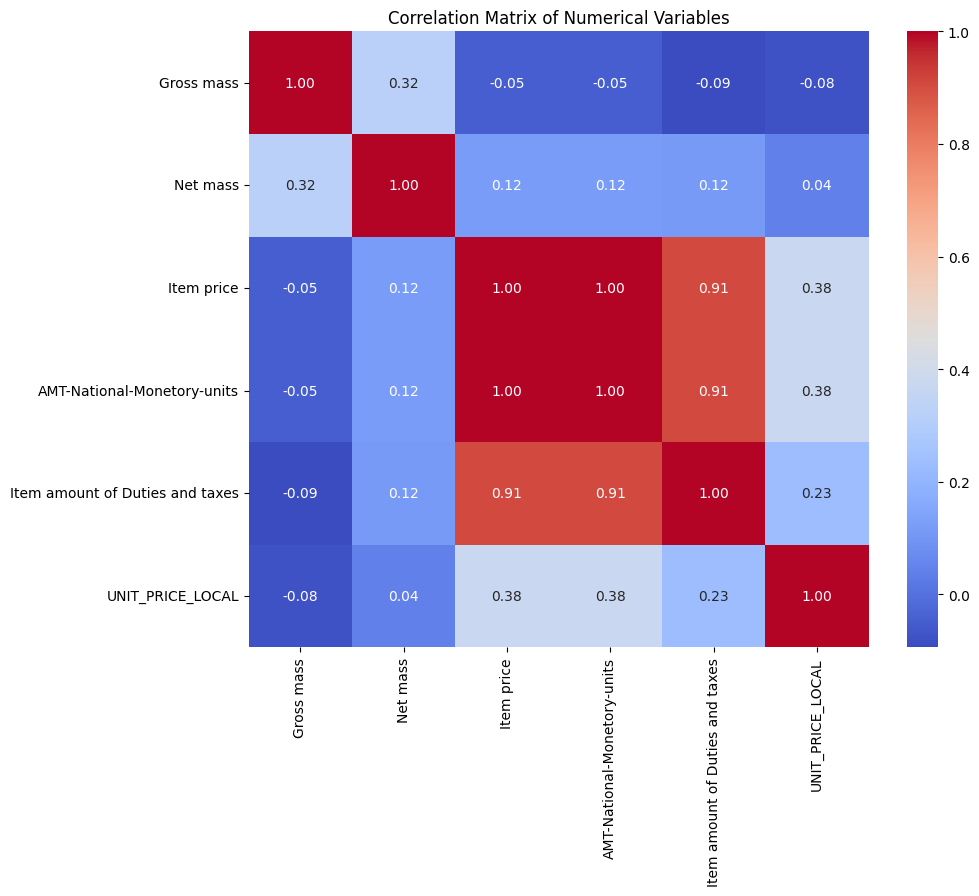

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_processed[['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


SORTED CORRELATIONS

In [ ]:
correlations_with_unit_price = correlation_matrix['UNIT_PRICE_LOCAL'].drop('UNIT_PRICE_LOCAL')
sorted_correlations = correlations_with_unit_price.abs().sort_values(ascending=False)
print("\nFeatures most correlated with UNIT_PRICE_LOCAL (After Outlier Handling):")
print(sorted_correlations)


Features most correlated with UNIT_PRICE_LOCAL (After Outlier Handling):
Item price                         0.375136
AMT-National-Monetory-units        0.375136
Item amount of Duties and taxes    0.229867
Gross mass                         0.078900
Net mass                           0.039803
Name: UNIT_PRICE_LOCAL, dtype: float64


### FEATURE ENGINEERING
#### Processes of feature engineering
#### weight ratio, price per unit weight, log transformation to handle skewness, Data scaling

In [ ]:
# Feature Engineering: Weight Ratio:
data_processed['Weight_Ratio'] = data_processed['Net mass'] / data_processed['Gross mass']

In [ ]:
#Price per unit weight:
data_processed['Price_per_unit_weight'] = data_processed['Item price'] / data_processed['Net mass']

In [ ]:
#Interaction term between 'Item price' and 'AMT-National-Monetory-units'
data_processed['Price_x_Amount'] = data_processed['Item price'] * data_processed['AMT-National-Monetory-units']

In [ ]:
#Log Transformation of skewed features (if needed)
# Check distributions again after outlier removal to see if log transformation is still needed.
for col in ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes', 'UNIT_PRICE_LOCAL']:
    if data_processed[col].min() > 0: # Log transform only if no zeros or negative values
      data_processed[f'{col}_log'] = np.log1p(data_processed[col])


In [ ]:
data_processed.columns

Index(['HS code', 'Gross mass', 'Net mass', 'Item price',
       'AMT-National-Monetory-units', 'Item amount of Duties and taxes',
       'UNIT_PRICE_LOCAL', 'Weight_Ratio', 'Price_per_unit_weight',
       'Price_x_Amount', 'Gross mass_log', 'Net mass_log', 'Item price_log',
       'AMT-National-Monetory-units_log',
       'Item amount of Duties and taxes_log', 'UNIT_PRICE_LOCAL_log',
       'Country_CN', 'Country_GH', 'Country_GN', 'Country_NG', 'Country_NL',
       'Country_US'],
      dtype='object')

In [ ]:
data_processed.head()

,HS code,Gross mass,Net mass,Item price,AMT-National-Monetory-units,Item amount of Duties and taxes,UNIT_PRICE_LOCAL,Weight_Ratio,Price_per_unit_weight,Price_x_Amount,...,Item price_log,AMT-National-Monetory-units_log,Item amount of Duties and taxes_log,UNIT_PRICE_LOCAL_log,Country_CN,Country_GH,Country_GN,Country_NG,Country_NL,Country_US
3,94015000.0,194.54,150.0,1285.39,1285.39,447.56,257.078,0.771050,8.569267,1.652227e+06,...,7.159595,7.159595,6.106042,5.553262,True,False,False,False,False,False
5,85181000.0,77.82,50.0,102.91,102.91,35.81,51.455,0.642508,2.058200,1.059047e+04,...,4.643525,4.643525,3.605770,3.959956,True,False,False,False,False,False
7,85163100.0,155.64,124.0,164.66,164.66,92.55,41.165,0.796710,1.327903,2.711292e+04,...,5.109937,5.109937,4.538496,3.741590,True,False,False,False,False,False
9,84141000.0,38.91,25.0,86.07,86.07,11.54,86.070,0.642508,3.442800,7.408045e+03,...,4.466712,4.466712,2.528924,4.466712,True,False,False,False,False,False
10,57033000.0,38.91,30.0,204.42,204.42,60.23,204.420,0.771010,6.814000,4.178754e+04,...,5.325057,5.325057,4.114637,5.325057,True,False,False,False,False,False


In [ ]:
# If you treat HS code as categorical
data_processed['HS code'] = data_processed['HS code'].astype('category').cat.codes

In [ ]:
# Example of one-hot encoding any remaining categorical columns
data_processed = pd.get_dummies(data_processed, drop_first=True)

In [ ]:
#Feature Scaling (Consider StandardScaler or MinMaxScaler)
# Separate features (X) and target (y)
X = data_processed.drop('UNIT_PRICE_LOCAL', axis=1)
y = data_processed['UNIT_PRICE_LOCAL']

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Combine scaled features with the target variable
data_processed_scaled = pd.concat([X_scaled, y], axis=1)

In [ ]:
X

,HS code,Gross mass,Net mass,Item price,AMT-National-Monetory-units,Item amount of Duties and taxes,Weight_Ratio,Price_per_unit_weight,Price_x_Amount,Gross mass_log,...,Item price_log,AMT-National-Monetory-units_log,Item amount of Duties and taxes_log,UNIT_PRICE_LOCAL_log,Country_CN,Country_GH,Country_GN,Country_NG,Country_NL,Country_US
3,50,194.54,150.00,1285.39,1285.39,447.56,0.771050,8.569267,1.652227e+06,5.275765,...,7.159595,7.159595,6.106042,5.553262,True,False,False,False,False,False
5,38,77.82,50.00,102.91,102.91,35.81,0.642508,2.058200,1.059047e+04,4.367167,...,4.643525,4.643525,3.605770,3.959956,True,False,False,False,False,False
7,35,155.64,124.00,164.66,164.66,92.55,0.796710,1.327903,2.711292e+04,5.053950,...,5.109937,5.109937,4.538496,3.741590,True,False,False,False,False,False
9,21,38.91,25.00,86.07,86.07,11.54,0.642508,3.442800,7.408045e+03,3.686627,...,4.466712,4.466712,2.528924,4.466712,True,False,False,False,False,False
10,4,38.91,30.00,204.42,204.42,60.23,0.771010,6.814000,4.178754e+04,3.686627,...,5.325057,5.325057,4.114637,5.325057,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,31,324.00,261.19,117.97,117.97,22.12,0.806142,0.451664,1.391692e+04,5.783825,...,4.778871,4.778871,3.140698,4.778871,False,False,False,False,True,False
270,30,324.00,261.19,15.73,15.73,2.94,0.806142,0.060224,2.474329e+02,5.783825,...,2.817204,2.817204,1.371181,2.817204,False,False,False,False,True,False
271,31,324.00,261.19,7.86,7.86,1.45,0.806142,0.030093,6.177960e+01,5.783825,...,2.181547,2.181547,0.896088,2.181547,False,False,False,False,True,False
272,31,324.00,261.19,15.73,15.73,2.94,0.806142,0.060224,2.474329e+02,5.783825,...,2.817204,2.817204,1.371181,2.817204,False,False,False,False,True,False


In [ ]:
y

,UNIT_PRICE_LOCAL
3,257.078
5,51.455
7,41.165
9,86.070
10,204.420
...,...
269,117.970
270,15.730
271,7.860
272,15.730


### MODELING

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),  # Adjust parameters as needed
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Dictionary to store results
results = {}

# Loop over the models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

    # Store the results in the dictionary
    results[name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae}

    # Print the results for each model
    print(f'{name}: MSE = {mse:.4f}, R-squared = {r2:.4f}, MAE = {mae:.4f}')


Linear Regression: MSE = 4697.3295, R-squared = 0.6794, MAE = 54.9784
Random Forest: MSE = 1570.6076, R-squared = 0.8928, MAE = 16.6664
XGBoost: MSE = 1600.4866, R-squared = 0.8908, MAE = 19.8757


### OPINION ON THE RESULTS
#### The results of the three models indicate notable differences in performance. Linear Regression achieved a relatively high Mean Squared Error (MSE) of 4697.33 and an R-squared value of 0.6794, suggesting a moderate fit to the data. While the R-squared value indicates that approximately 67.94% of the variance in the target variable is explained by the model, the MSE and Mean Absolute Error (MAE) values, which stand at 4697.33 and 54.98 respectively, reveal that the model is making sizable errors in predictions. This could suggest that a linear relationship between the features and target variable is not fully representative of the underlying complexity of the data.

#### On the other hand, Random Forest performed significantly better, with an MSE of 1570.61, R-squared of 0.8928, and MAE of 16.67. The model explained approximately 89.28% of the variance, which is a strong indication that it captured most of the patterns in the data. The considerably lower MSE and MAE reflect the model's ability to provide more accurate predictions, making it a much more reliable choice compared to linear regression in this case.

#### XGBoost, with an MSE of 1600.49, R-squared of 0.8908, and MAE of 19.88, performed similarly to Random Forest, with a marginally lower R-squared and a slightly higher MSE and MAE. This result suggests that while XGBoost is still an effective model, it might not be as finely tuned to this specific dataset as Random Forest. However, XGBoost tends to be more robust in handling different types of data and outliers, so performance differences may be due to hyperparameter tuning or dataset characteristics.

#### In summary, both Random Forest and XGBoost significantly outperform Linear Regression, with Random Forest emerging as the top model in this case. The higher predictive accuracy of the ensemble methods (Random Forest and XGBoost) indicates their ability to capture more complex relationships within the data, while Linear Regression appears to struggle with these complexities.

### BULIDING THE ARTIFICIAL NEURAL NETWORK

In [ ]:
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Add dropout for regularization
    layers.BatchNormalization(), # Add batch normalization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Use Adam optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

In [ ]:
# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 29644.9824 - mae: 77.8823 - mse: 29644.9824 - val_loss: 37587.8008 - val_mae: 86.4880 - val_mse: 37587.8008
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 29604.2559 - mae: 77.7497 - mse: 29604.2559 - val_loss: 37578.0352 - val_mae: 86.4823 - val_mse: 37578.0352
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 29541.5996 - mae: 77.6093 - mse: 29541.5996 - val_loss: 37567.7305 - val_mae: 86.4732 - val_mse: 37567.7305
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 29482.4062 - mae: 77.6671 - mse: 29482.4062 - val_loss: 37558.9492 - val_mae: 86.4640 - val_mse: 37558.9492
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 29510.4512 - mae: 77.6676 - mse: 29510.4512 - val_loss: 37548.9102 - val_mae: 86.4540 - val_mse: 37548.9102
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 29471.3223 - mae: 77.5107 - mse: 29471.3223 - val_loss: 37537.4531 - val_mae: 86.4423 - val_mse: 37537.4531
Epo

In [ ]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 73.6913
Mean Squared Error (MSE): 17257.6406


#### The results from the Neural Network model, with a Mean Absolute Error (MAE) of 73.6913 and a Mean Squared Error (MSE) of 17257.6406, indicate that while the model has potential, it struggles with producing precise predictions in this particular case. The relatively high MAE suggests that the average error between the predicted and actual values is considerable, with predictions deviating by over 73 units on average. Additionally, the substantial MSE indicates that the model is making larger errors for some predictions, which could be caused by outliers or poor generalization to the data. Neural networks often excel in capturing complex, non-linear relationships, but these results highlight that the model might require further tuning, such as adjusting hyperparameters, enhancing data preprocessing, or increasing model complexity, to improve accuracy and reduce both MAE and MSE. It may also be beneficial to explore techniques like regularization to avoid overfitting and achieve better generalization on the test set.

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [ ]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): -0.1779


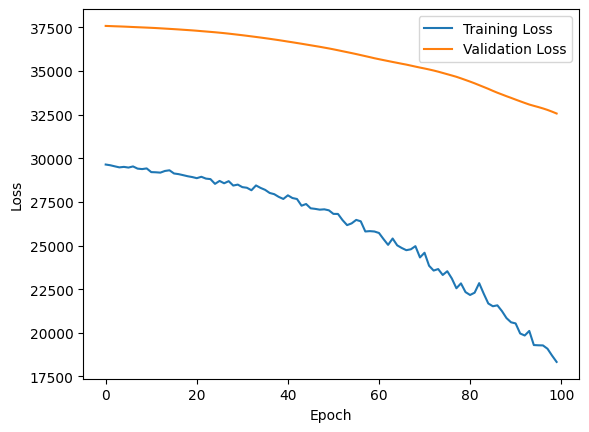

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The plot showing the training and validation loss across 100 epochs indicates that the model is learning effectively but might be showing signs of overfitting. The training loss (blue line) steadily decreases, suggesting that the model is improving its fit to the training data over time. However, the validation loss (orange line) decreases initially but then starts to plateau and even increases after a certain point. This divergence between the training and validation loss after around 50 epochs suggests that the model may be overfitting, meaning it is learning the details of the training data too well, including noise and outliers, and is not generalizing as effectively to unseen data. This is a common issue that can be addressed by techniques such as early stopping, regularization, or reducing model complexity to improve the model's generalization ability.

### Saving the best model to be used in deployment

In [ ]:
# Saving the best model (RandomForestRegressor in this case)
best_model = models['Random Forest']
joblib.dump(best_model, '/content/drive/My Drive/best_model.pkl')

['/content/drive/My Drive/best_model.pkl']

In [ ]:
# Verification: Load and check
loaded_model = joblib.load('/content/drive/My Drive/best_model.pkl')
# We can now use 'loaded_model' to make predictions

## DEPLOYMENT OF THE MODEL

In [ ]:
# Developing a streamlit app and deploying the model there

import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = joblib.load('/content/drive/My Drive/best_model.pkl')

# Load the scaler (assuming you saved it as well)
scaler = joblib.load('/content/drive/My Drive/scaler.pkl') # Replace with your scaler file path

st.title('Unit Price Prediction App')

# Input features
hs_code = st.number_input('HS Code', min_value=0) # Adjust min/max values as needed
country_of_origin_code = st.text_input('Country of Origin Code') # Ensure consistent input format as in training
gross_mass = st.number_input('Gross Mass', min_value=0.0)
net_mass = st.number_input('Net Mass', min_value=0.0)
item_price = st.number_input('Item Price', min_value=0.0)
amt_national_monetary_units = st.number_input('AMT National Monetary Units', min_value=0.0)
item_amount_of_duties_and_taxes = st.number_input('Item Amount of Duties and Taxes', min_value=0.0)

# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'HS code': [hs_code],
    'Country of origin - code': [country_of_origin_code],
    'Gross mass': [gross_mass],
    'Net mass': [net_mass],
    'Item price': [item_price],
    'AMT-National-Monetory-units': [amt_national_monetary_units],
    'Item amount of Duties and taxes': [item_amount_of_duties_and_taxes]
    # ... other input features
})


# Placeholder for any additional features and feature engineering
input_data['Weight_Ratio'] = input_data['Net mass'] / input_data['Gross mass']
input_data['Price_per_unit_weight'] = input_data['Item price'] / input_data['Net mass']
input_data['Price_x_Amount'] = input_data['Item price'] * input_data['AMT-National-Monetory-units']


#Get one hot encoded columns. You need to determine which columns are needed for your one hot encoding.
#For example, if you had a one-hot encoded column named 'Country of origin - code_US', then you'd create that column in input_data with a value of 1 or 0.

if 'Country of origin - code' in input_data.columns:
    #Replace with correct Country_origin codes from your training data
    if input_data['Country of origin - code'][0] in ['CN', 'US', 'VN','DE','IN']:  #Add all unique countries in the list
        for country in ['CN','US','VN','DE','IN']:
            input_data[f'Country of origin - code_{country}'] = 0
        input_data[f'Country of origin - code_{input_data["Country of origin - code"][0]}'] = 1
        input_data = input_data.drop(['Country of origin - code'], axis=1)
    else:
        st.write("Please enter a valid country code")
        st.stop()

# Apply log transformations, if applicable
for col in ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes']:
    if input_data[col].min() > 0:
        input_data[f'{col}_log'] = np.log1p(input_data[col])

#Remove columns not present in the training data
input_data = input_data.reindex(columns=X.columns, fill_value=0)


# Scale the input data using the loaded scaler
scaled_input = scaler.transform(input_data)
scaled_input_df = pd.DataFrame(scaled_input, columns=X.columns)

# Make prediction
prediction = model.predict(scaled_input_df)


# Display the prediction
st.write(f'Predicted Unit Price: {prediction[0]}')

2024-11-24 00:47:28.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 00:47:28.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit


In [ ]:

%%writefile app.py
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import joblib
#from transformers import BertTokenizer, TFBertForSequenceClassification
#from transformers import Trainer, TrainingArguments
#from datasets import load_dataset, Dataset
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the saved model and scaler (make sure these are in your drive)
model = joblib.load('/content/drive/MyDrive/best_model.pkl')
# Load the scaler (assuming you saved it as well)
scaler = joblib.load('/content/drive/My Drive/scaler.pkl') # Replace with your scaler file path

st.title('Unit Price Prediction App')

# Input features
hs_code = st.number_input('HS Code', min_value=0)
country_of_origin_code = st.text_input('Country of Origin Code')
gross_mass = st.number_input('Gross Mass', min_value=0.0)
net_mass = st.number_input('Net Mass', min_value=0.0)
item_price = st.number_input('Item Price', min_value=0.0)
amt_national_monetary_units = st.number_input('AMT National Monetary Units', min_value=0.0)
item_amount_of_duties_and_taxes = st.number_input('Item Amount of Duties and Taxes', min_value=0.0)

# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'HS code': [hs_code],
    'Country of origin - code': [country_of_origin_code],
    'Gross mass': [gross_mass],
    'Net mass': [net_mass],
    'Item price': [item_price],
    'AMT-National-Monetory-units': [amt_national_monetary_units],
    'Item amount of Duties and taxes': [item_amount_of_duties_and_taxes]
})

# Feature Engineering (must match training data)
input_data['Weight_Ratio'] = input_data['Net mass'] / input_data['Gross mass']
input_data['Price_per_unit_weight'] = input_data['Item price'] / input_data['Net mass']
input_data['Price_x_Amount'] = input_data['Item price'] * input_data['AMT-National-Monetory-units']


# One-hot encoding (replace with your actual columns)
if 'Country of origin - code' in input_data.columns:
    # Example (replace with correct country codes from your training data)
    country_codes = ['CN', 'US', 'VN','DE','IN'] #Replace with your actual country codes
    for country in country_codes:
      input_data[f'Country of origin - code_{country}'] = 0
    if input_data['Country of origin - code'][0] in country_codes:
      input_data[f'Country of origin - code_{input_data["Country of origin - code"][0]}'] = 1
      input_data.drop('Country of origin - code', axis=1, inplace=True)
    else:
      st.write('Invalid country code')
      st.stop()

# Log transformation (apply if used during training)
for col in ['Gross mass', 'Net mass', 'Item price', 'AMT-National-Monetory-units', 'Item amount of Duties and taxes']:
    if input_data[col].min() > 0:
        input_data[f'{col}_log'] = np.log1p(input_data[col])


#Align columns with training data
# Load the columns from your training data (X.columns from your training code)
try:
    X_columns = joblib.load('/content/drive/MyDrive/X_columns.pkl') # Load the columns of your training set
    input_data = input_data.reindex(columns=X_columns, fill_value=0)
except FileNotFoundError:
    st.error("X_columns.pkl not found in your Google Drive. Please upload the file.")
    st.stop()

# Scale input features using the loaded scaler
scaled_input = scaler.transform(input_data)
scaled_input_df = pd.DataFrame(scaled_input, columns=input_data.columns)

# Make prediction
prediction = model.predict(scaled_input_df)

# Display the prediction
st.write(f'Predicted Unit Price: {prediction[0]}')

Overwriting app.py


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok config add-authtoken 2pGzcYaej8Dp3ExRMHPF0nvrj80_NpepKd7uGMZFJP4QqR2q


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
import os

# Set the port for the Streamlit app (default is 8501)
port = 8501

# Open a tunnel to the Streamlit app
public_url = ngrok.connect(port)

# Run the Streamlit app
os.system(f"streamlit run app.py --server.port {port} &")

print('Streamlit app is live at:', public_url)



Streamlit app is live at: NgrokTunnel: "https://bfff-35-231-180-234.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import joblib
# Save X.columns
try:
    X_columns = X.columns
    joblib.dump(X_columns, '/content/drive/MyDrive/X_columns.pkl')
    print("X_columns saved successfully.")
except NameError:
    print("X is not defined. Please ensure you run the code defining X before saving X_columns.")
except Exception as e:
    print(f"An error occurred while saving X_columns: {e}")
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl') #Save the scaler

X_columns saved successfully.


['/content/drive/MyDrive/scaler.pkl']